In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

# SWAHE

El Sliding Window Adaptative Histogram Equalization (SWAHE) es una variación de la equalización de histogramas en la que se utiliza una ventana deslizante para tomar unicamante los pixeles adyacentes a cada region de la imagen para calcular el histograma. De esta manera se logra equalizar cada zona de la imagen a un nivel distinto. Dependiendo del tamaño de ventana seleccionado se pueden producir distintos resultados. Como se observa en los ejemplos, al seleccionar un tamaño de ventana mayor
 (cuidando no llegar al tamaño de la imagen) se obtienen mejores resultados, sin embargo toma mayor tiempo de procesamiento.

A continuación una implementación sencilla del algoritmo SWAHE donde se calcula el histograma para cada sub matriz generada.

In [3]:
def swahe(img, window_size):
    height = len(img)
    width = len(img[0])
    if window_size % 2 == 0:
        window_size -= 1
        delta = window_size // 2
        new_img = img.copy()
    for i in range(height):
        for j in range(width):
            mat = img[
                  max(0, i - delta):min(height, i + delta + 1),
                  max(0, j - delta):min(width, j + delta + 1)
                  ]
            equ = cv.equalizeHist(mat)
            x = min(i, delta)
            y = min(j, delta)
            new_img[i, j] = equ[x, y]
    return new_img

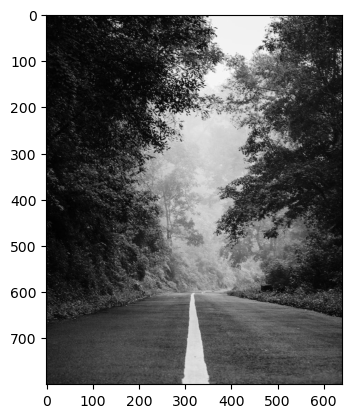

In [37]:
img = cv.imread('Images/1.jpg', 0)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

In [38]:
pr_img1 = swahe(img, 150)
pr_img2 = swahe(img, 300)
pr_img3 = swahe(img, 500)

<Figure size 640x480 with 0 Axes>

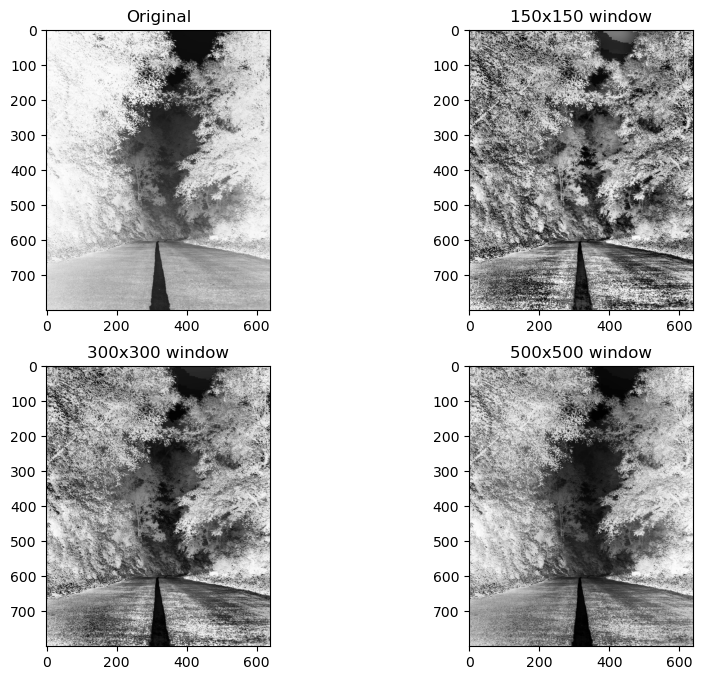

In [39]:
plt.figure()
f, ax = plt.subplots(2,2, figsize=(10,8))

i1 = cv.bitwise_not(img)
i2 = cv.bitwise_not(pr_img1)
i3 = cv.bitwise_not(pr_img2)
i4 = cv.bitwise_not(pr_img3)

ax[0,0].imshow(i1, cmap="gray", vmin=0, vmax=255)
ax[0,1].imshow(i2, cmap="gray", vmin=0, vmax=255)
ax[1,0].imshow(i3, cmap="gray", vmin=0, vmax=255)
ax[1,1].imshow(i4, cmap="gray", vmin=0, vmax=255)

ax[0,0].title.set_text('Original')
ax[0,1].title.set_text('150x150 window')
ax[1,0].title.set_text('300x300 window')
ax[1,1].title.set_text('500x500 window')

plt.show()

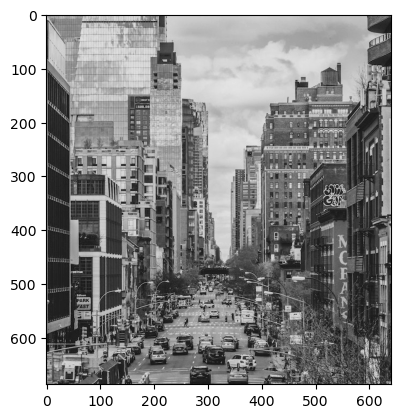

In [32]:
img2 = cv.imread('Images/3.jpg', 0)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.show()

In [28]:
pr_img21 = swahe(img2, 150)
pr_img22 = swahe(img2, 300)
pr_img23 = swahe(img2, 500)

<Figure size 640x480 with 0 Axes>

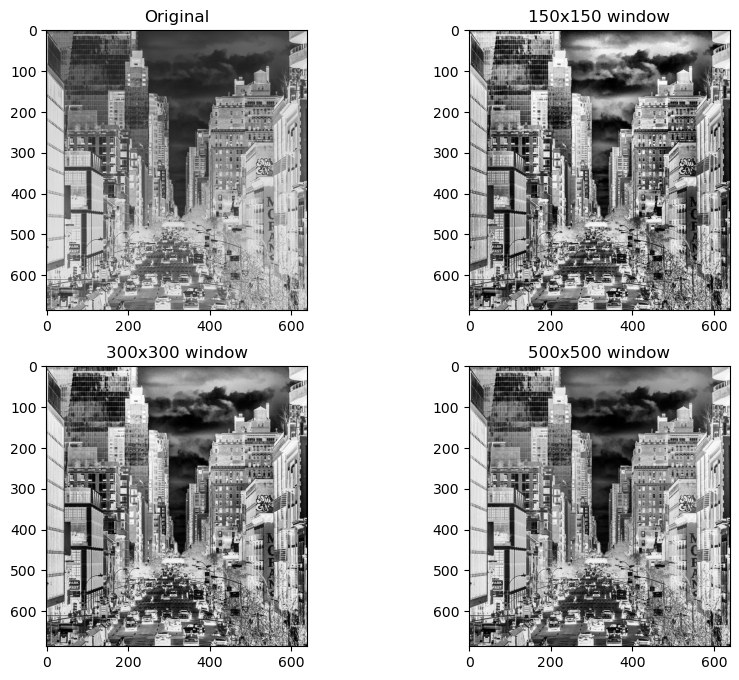

In [29]:
plt.figure()
f, ax = plt.subplots(2,2, figsize=(10,8))

i1 = cv.bitwise_not(img2)
i2 = cv.bitwise_not(pr_img21)
i3 = cv.bitwise_not(pr_img22)
i4 = cv.bitwise_not(pr_img23)

ax[0,0].imshow(i1, cmap="gray", vmin=0, vmax=255)
ax[0,1].imshow(i2, cmap="gray", vmin=0, vmax=255)
ax[1,0].imshow(i3, cmap="gray", vmin=0, vmax=255)
ax[1,1].imshow(i4, cmap="gray", vmin=0, vmax=255)

ax[0,0].title.set_text('Original')
ax[0,1].title.set_text('150x150 window')
ax[1,0].title.set_text('300x300 window')
ax[1,1].title.set_text('500x500 window')

plt.show()

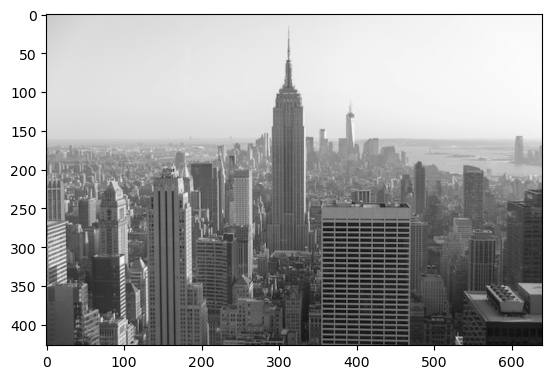

In [31]:
img3 = cv.imread('Images/4.jpg', 0)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.show()

In [34]:
pr_img31 = swahe(img3, 80)
pr_img32 = swahe(img3, 170)
pr_img33 = swahe(img3, 350)

<Figure size 640x480 with 0 Axes>

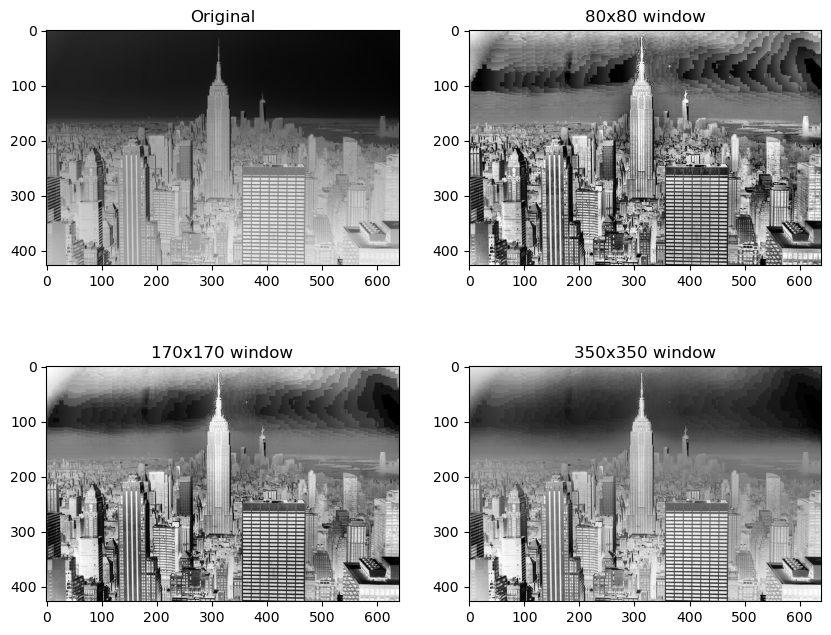

In [35]:
plt.figure()
f, ax = plt.subplots(2,2, figsize=(10,8))

i1 = cv.bitwise_not(img3)
i2 = cv.bitwise_not(pr_img31)
i3 = cv.bitwise_not(pr_img32)
i4 = cv.bitwise_not(pr_img33)

ax[0,0].imshow(i1, cmap="gray", vmin=0, vmax=255)
ax[0,1].imshow(i2, cmap="gray", vmin=0, vmax=255)
ax[1,0].imshow(i3, cmap="gray", vmin=0, vmax=255)
ax[1,1].imshow(i4, cmap="gray", vmin=0, vmax=255)

ax[0,0].title.set_text('Original')
ax[0,1].title.set_text('80x80 window')
ax[1,0].title.set_text('170x170 window')
ax[1,1].title.set_text('350x350 window')

plt.show()